# Naive Bayes Gaussiano aplicado no banco de dados Iris

Neste notebook foi implementado o algoritmo Naive Bayes Gaussiano no problema de classificação de espécies de flores Íris. 

O conjunto de dados Íris pode ser baixado no repositório da UCI Machine Learning Repository em http://archive.ics.uci.edu/ml/datasets/Iris.

O conjunto de dados é composto por medidas do comprimento e largura (em centímetros) das sépalas e pétalas de diversas flores íris. 

<img src="https://raw.githubusercontent.com/ritchieng/machine-learning-dataschool/master/images/03_iris.png" alt="Iris">

São também previamente identificadas espécies do tipo Iris-setosa, Iris-versicolor e Iris-virginica de acordo com as medidas de comprimento e larguras de suas sépalas e pétalas.

Nosso objetivo é criar um modelo de Machine Learning supervisionado que aprenderá com o conjunto de dados e posteriormente será capaz de classificar uma flor Íris em algumas das espécies mencionadas anteriormente com base nas medidas de comprimento e larguras de suas sépalas e pétalas.

O modelo escolhido foi o Naive Bayes Gaussiano (GNB).

Maiores detalhes sobre o algoritmo Naive Bayes e Naive Bayes Gaussiano você encontra em  http://bit.ly/genesisNB e https://bit.ly/3r1vRTj 

# Importar as bibliotecas básicas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o conjunto de dados

In [2]:
iris_dataset = pd.read_csv('Iris_dataset.csv')
print(iris_dataset.shape)
iris_dataset

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,specie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


A dimensão do conjunto de dados é 150x5. Isso significa que temos 150 exemplos de flores, com suas respectivas medidas de comprimento e larguras das sépalas e pétalas (4 recursos) e a classificação correspondente. 

Vamos checar as classes presentes no conjunto de dados

In [3]:
iris_dataset['specie'].unique().tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Como esperado, temos três classes diferentes: Iris-setosa, Iris-versicolor, Iris-virginica. 

O comando a seguir nos dá uma descrição estatística básica do nosso conjunto de dados.

In [4]:
iris_dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


É importante verificar se não há dados ausentes no conjunto de dados. Na linha 'count' podemos observar que todos os recursos possuem 150 medições. O que indica que não há dados ausentes.

Podemos confirmar isso através do comando abaixo, que nos dará a quantidade de dados ausentes nas colunas do conjunto de dados. 

In [5]:
iris_dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
specie          0
dtype: int64

# Visualizar dos dados

O comando abaixo mostrará os gráficos cruzados entre todos os recursos do banco de dados e separará por cores as diferentes espécies de Íris. 

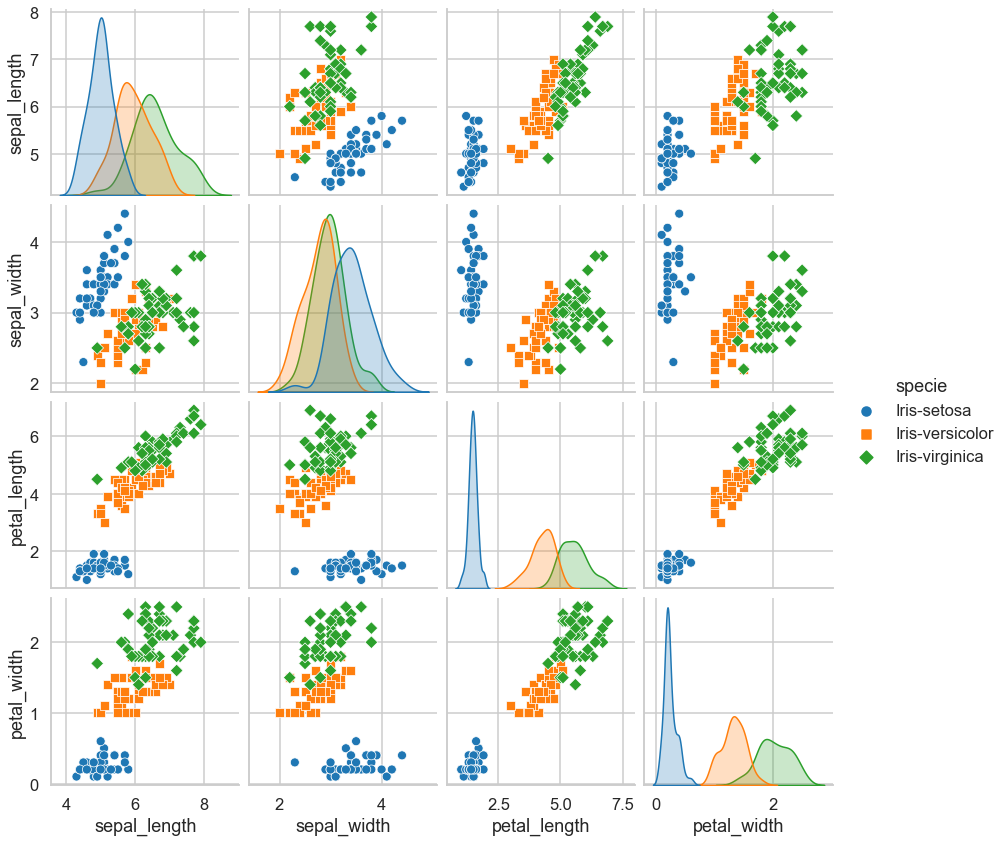

In [6]:
sns.set_style("whitegrid")
sns.set_context("talk")
sns.pairplot(iris_dataset, hue = 'specie', markers=["o", "s", "D"], height = 3)
plt.show()

Nota-se uma boa separação entre as classes, principalmente para a espécie Íris-Setosa. No entanto, alguns pontos para as espécies 'Iris-versicolor' e 'Iris-virginica' se sobrepõem, o que trará dificuldades no processo de classificação do algoritmo. 

Como vamos aplicar o algoritmo GNB, é importante atentar para as distribuições de probabilidade dos recursos. Quanto mais próximas de uma distribuição Gaussiana, melhor será o desempenho do modelo. 

# Definir os recursos e o alvo do modelo

Os recursos do nosso modelo são as medidas de comprimento e largura das sépalas e pétalas, ou seja, todos os recursos são numéricos. Já o alvo é o tipo de espécie de flor Íris, que no caso, são três possíveis: Iris-setosa, Iris-versicolor, Iris-virginica.

 Guardaremos os recursos na variável X, que será uma matriz 150x4 e o alvo em y, um vetor 150x1.

In [7]:
X = iris_dataset.drop('specie', axis=1)
y = iris_dataset['specie']

# Separar os dados em treinamento e teste

O comando abaixo separa os dados em dados de treinamento, composto por 80% do total de dados, e dados de teste, formado pelos 20% restantes, no qual o modelo será avaliado. 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Construir os modelos de classificação

Primeiro, implementamos o algoritmo Naive Bayes Gaussiano diretamente em Python. Em seguida, usaremos as bibliotecas  scikit-learn para criar um modelo GNB e compararemos os resultados.  

## Criar um modelo GNB do zero em python

In [9]:
def GNB_prior(X_train,y_train):
    ###########################################################################
    # Esta função recebe os recursos (X_train) e alvo (y_train) de treinamento.
    # e calcula as probabilidades a priori para cada classe em y
    ###########################################################################    
    classes, classes_freq = np.unique(y_train, return_counts=True)
    classes_freq_dic = dict(zip(classes, classes_freq))
    print('As frequências de cada classe são: \n', classes_freq_dic)
    ###########################################################################
    ######### Calcular as probabilidades a priori de cada classe #########
    py = classes_freq/len(y_train)  # dicionário com as classes e suas respectivas prob. a priori
    py_dic = dict(zip(classes, py))
    print('As probabilidades a priori de cada classes são: \n ', py_dic)
    ###########################################################################
    return py_dic
    ###########################################################################

In [10]:
def GNB_gaussian_fit(X_train,y_train):
    ###########################################################################
    # Esta função recebe os recursos (X_train) e alvo (y_train) de treinamento.
    # e calcula as médias e desvios padrão para cada classe em y
    ###########################################################################
    ######### Calcular a média e desvio padrão de cada classe #########
    classes = np.unique(y_train)
    mu_dic = {}
    sigma_dic = {}
    for cls in classes:
        X_cls = X_train[y_train==cls]
        class_mean = np.mean(X_cls, axis=0)       
        mu_dic[cls] = class_mean
        X_std = np.std(X_cls, axis=0)
        sigma_dic[cls] = X_std
    
    print('As médias de cada classe são: \n ', mu_dic) 
    print('Os desvios padrão de cada classe são: \n ', sigma_dic)
    ###########################################################################    
    return mu_dic, sigma_dic
    ###########################################################################

In [11]:
def gaussian_PDF(x, mu, sigma):
    ###########################################################################
    # Esta função calcula a fdp gaussiana dos dados x, com base na média mu 
    # e desvio padrão sigma de cada classe.  
    ###########################################################################
    gaussian = (1/(np.sqrt(2*np.pi)*sigma))*np.exp(-((x - mu)**2/(2*sigma**2)))
    return gaussian

In [12]:
def GNB_pred(X_test, py, mu, sigma): 
    ###########################################################################
    # Esta função recebe os dados de teste X_test, as probabilidades a priori py,
    # a média nu e o desvio padrão sigma de cada classe, e com base no modelo GNB 
    # prever as espécies de flores Íris correspondentes. 
    ###########################################################################
    n = len(X_test)
    classes = mu.keys()
    y_pred = []
    max_prob = []
    class_prob_dic = {}
    for cls in classes:
        gaussian = gaussian_PDF(X_test, mu[cls], sigma[cls]).sum(axis=1)
        class_prob = np.log(py[cls]) + np.log(gaussian)
        class_prob_dic[cls] = class_prob
        
    class_prob_df = pd.DataFrame(class_prob_dic)
    y_pred = class_prob_df.idxmax(axis=1)
    return y_pred

In [13]:
# calcular as probabilidades a priori de cada classe. 
# O resultado é dado na forma de dicionário python
py = GNB_prior(X_train,y_train)

As frequências de cada classe são: 
 {'Iris-setosa': 39, 'Iris-versicolor': 37, 'Iris-virginica': 44}
As probabilidades a priori de cada classes são: 
  {'Iris-setosa': 0.325, 'Iris-versicolor': 0.30833333333333335, 'Iris-virginica': 0.36666666666666664}


In [14]:
# calcular a média e o desvio padrão de cada classe. 
# O resultado é dado na forma de dicionário python
mu, sigma = GNB_gaussian_fit(X_train,y_train)

As médias de cada classe são: 
  {'Iris-setosa': sepal_length    5.020513
sepal_width     3.402564
petal_length    1.461538
petal_width     0.238462
dtype: float64, 'Iris-versicolor': sepal_length    5.886486
sepal_width     2.762162
petal_length    4.216216
petal_width     1.324324
dtype: float64, 'Iris-virginica': sepal_length    6.638636
sepal_width     2.988636
petal_length    5.565909
petal_width     2.031818
dtype: float64}
Os desvios padrão de cada classe são: 
  {'Iris-setosa': sepal_length    0.359615
sepal_width     0.376548
petal_length    0.142533
petal_width     0.107692
dtype: float64, 'Iris-versicolor': sepal_length    0.513684
sepal_width     0.322450
petal_length    0.479591
petal_width     0.201890
dtype: float64, 'Iris-virginica': sepal_length    0.623850
sepal_width     0.328368
petal_length    0.542697
petal_width     0.253855
dtype: float64}


In [15]:
# Previsão das espécies de íris
my_y_pred = GNB_pred(X_test, py, mu, sigma)

## Criar um modelo de GNB usando bibliotecas scikit-learn

In [16]:
# Importar a biblioteca do modelo GNB 
from sklearn.naive_bayes import GaussianNB

In [17]:
# Criar um classificador GNB
model = GaussianNB()
# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)
# Prever as classes 
sklearn_y_pred = model.predict(X_test)

## Avaliar os modelos por meio de métricas de classificação

In [18]:
from sklearn import metrics

In [19]:
# Métricas do modelo criado do zero
print(metrics.classification_report(y_test, my_y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



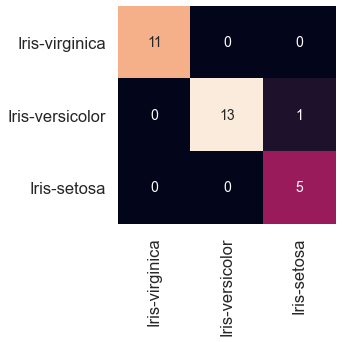

In [20]:
# Matriz de confusão do modelo criado do zero
mat = metrics.confusion_matrix(y_test, my_y_pred)
g = sns.heatmap(mat.T, square=True, annot=True, annot_kws={"fontsize":14},  fmt='d', cbar=False,
                xticklabels=y_train.unique().tolist(),
                yticklabels=y_train.unique().tolist())

In [21]:
# Métricas do modelo sklearn
print(metrics.classification_report(y_test, sklearn_y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



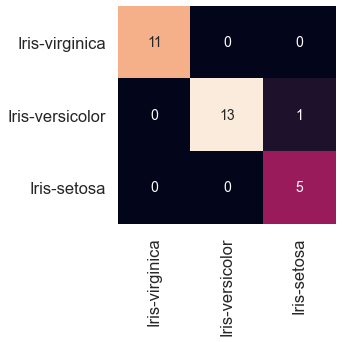

In [22]:
# Matriz de confusão do modelo sklearn
mat = metrics.confusion_matrix(y_test, sklearn_y_pred)
g = sns.heatmap(mat.T, square=True, annot=True, annot_kws={"fontsize":14},  fmt='d', cbar=False,
                xticklabels=y_train.unique().tolist(),
                yticklabels=y_train.unique().tolist())

# Conclusões

- As métricas dos dois modelos são exatamente iguais. Ambos conseguem prever as classes do conjunto de treinamento com uma acurácia total de 97%. 

- Vemos que, como mostrado nos gráficos cruzados, a classe Iris-setosa apresenta maior grau de separação com relação às demais e, dessa forma, os modelos conseguem prever com exatidão todas as amostras dessa classe, como esperado. Já com respeito às duas outras classes, o modelo tem maior dificuldade de predição, devido ao já mencionado fato da sobreposição de alguns pontos. 

- Por fim, é importante destacar que esse é um exemplo simples, tanto na aplicação, quanto nas métricas de avaliação aplicadas. Uma análise mais profunda do desempenho do modelo seria realizada por meio de uma validação-cruzada e uso de outras métricas de avaliação. 

Para maiores detalhes sobre métricas de classificação, acesse: https://bit.ly/genesisMetrics1